# Jupyter Example 1 for HERMES: Dispersion measure

In [1]:
from pyhermes import *
from pyhermes.units import *

import astropy.units as u

import numpy as np
import healpy
import matplotlib.pyplot as plt

In [2]:
nside = 128
sun_pos = Vector3QLength(8.3*kpc, 0*pc, 6*pc)

In [3]:
skymap = DMSkymap(nside=nside)
gas = YMW16()
integrator = DMIntegrator(gas)
integrator.setSunPosition(sun_pos)

In [4]:
skymap.setIntegrator(integrator)
skymap.compute()

In [5]:
#use_units = skymap.getUnits() # default units for DM skymap
use_units = "pc^-1 cm^3"
skymap_units = u.Quantity(1, use_units)
base_units = skymap_units.unit.si.scale

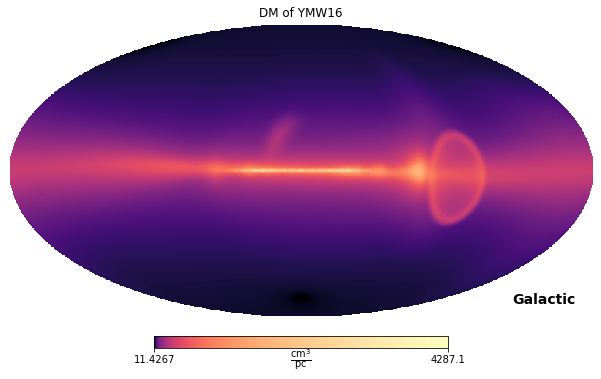

In [6]:
healpy.visufunc.mollview(
    np.array(skymap)*base_units,
    title='DM of YMW16', cmap='magma',
    norm="log", coord='G', unit=skymap_units.unit.to_string(format='latex'))

Text(0, 0.5, 'DM / $\\mathrm{\\frac{cm^{3}}{pc}}$')

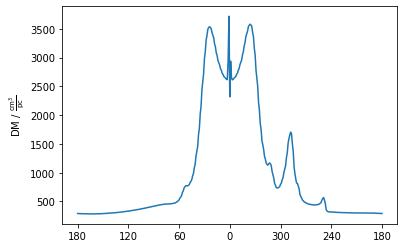

In [7]:
angles = np.concatenate([np.arange(180,-1,-1), np.arange(359,179,-1)])
pixels = [ang2pix_ring(nside, fromGalCoord([0*deg, l*deg])) for l in angles]
for p in pixels:
    skymap.computePixel(p, integrator)

values = [skymap.getPixel(p)*base_units for p in pixels]
plt.plot(range(0,361), values)
plt.xticks([0, 60,  120, 180, 240, 300, 360],
           labels=('180', '120',  '60', '0', '300', '240', '180'))
plt.ylabel("DM / " + skymap_units.unit.to_string(format='latex'))